In [28]:
library(caret)
df_original <- read.csv('../cleaned_data/cleaning_data-02.csv')
#df <- replace(df, is.na(df), 99999)
#df <- df[, c(-1,-2,-3,-4,-9)]
#df <- as.data.frame(lapply(df, as.factor))
#print(head(df))

# Base Model: Logistic Regression

Independent Variable D1A_1V1L: Internal: Primary purpose of trip: work/earn money - Last, Head

Dependent Variable. A12: Household: Can you write a letter?\
A13: Household: Level of education (Highest level passed) A14: Household: Livelihood/occupation D1A_6AL: Internal: District of destination - Last, Head D1A_7ML: Internal: Month of arrival - Last, Head A15V1: Household: Have migration experience?: Internal -- not in cleaned data? A15V2: Household: Have migration experience?: India -- not in cleaned data? A15V3: Household: Have migration experience?: Other country A15V4: Household: Have migration experience?: No migration

In [29]:
#df1 <-df_original[, c("D1A_1V1L", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4")]
df1 <-df_original[, c("D1A_1V1L", "A08", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4", "D1A_4", "A11Y" ,"N1_6TAKA", "N1_12", "N1_13", "N1_14", "N1_16", "N1_17", "D1A_10AF_3M", "D1A_10AL_3M", "D1A_8F")]
df1$Age <- 2019 - df1$A08
df1 <-df1[, c("D1A_1V1L", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4", "D1A_4", "A11Y" ,"N1_6TAKA", "N1_12", "N1_13", "N1_14", "N1_16", "N1_17", "D1A_10AF_3M", "D1A_10AL_3M", "D1A_8F")]
# temporarily taking out D1A_6AL

#converting cateogorical variables to factor
columns_to_factor <- c("D1A_1V1L", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4")
df1[columns_to_factor] <- lapply(df1[columns_to_factor], factor)

#df1 <- as.data.frame(lapply(df1, factor))
print(head(df1))

  D1A_1V1L  A12  A13  A14 D1A_7ML A15V1 A15V4 D1A_4 A11Y N1_6TAKA N1_12 N1_13
1     <NA>    1    4   14    <NA>  <NA>     4    NA   NA       NA    NA    NA
2     <NA> <NA>    2 <NA>    <NA>  <NA>     4    NA   NA       NA    NA    NA
3     <NA> <NA> <NA> <NA>    <NA>  <NA>     4    NA   NA       NA    NA    NA
4     <NA>    2    2   17    <NA>  <NA>     4    NA   13       NA    NA    NA
5     <NA>    1    4   10    <NA>  <NA>  <NA>    NA   19       NA    NA    NA
6     <NA>    2    4   17    <NA>     1  <NA>    NA   18       NA    NA    NA
  N1_14 N1_16 N1_17 D1A_10AF_3M D1A_10AL_3M D1A_8F
1    NA    NA    NA          NA          NA     NA
2    NA    NA    NA          NA          NA     NA
3    NA    NA    NA          NA          NA     NA
4    NA    NA    NA          NA          NA     NA
5    NA    NA    NA          NA          NA     NA
6    NA    NA    NA          NA          NA     NA


In [30]:
# converting variables to dummy variables
library("fastDummies")
df1 <- fastDummies::dummy_cols(df1, remove_first_dummy = TRUE, remove_selected_columns = TRUE)
print(dim(df1))

[1] 23506    59


In [31]:
# removing rows that do not have D1A_1V1L
df1 <- df1[!is.na(df1$D1A_1V1L_1), ]
#df1 <- df1[!is.na(df1$D1A_1V1L), ]
# Dropped duplicate columns that we made into dummy variables already
#df1 <- df1[, -which(names(df1) %in% c("D1A_1V1L_1", "D1A_1V1L_0", "D1A_1V1L_NA", "A12_2", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4"))]
#replace NA with 0, 0 meaning "No", assuming that if the participant did not say yes to a question, than it would be no.
df1 <- replace(df1, is.na(df1), 0)
print(head(df1))

   D1A_4 A11Y N1_6TAKA N1_12 N1_13 N1_14 N1_16 N1_17 D1A_10AF_3M D1A_10AL_3M
11     1   29    13000     0 12000     0  1000     0       18000       18000
33     1   21    39800     0  3000     0   300     0       20000       20000
38     4   23     1000  7000 10000 10000  2000 30000           0           0
43     1   21     6000  1500  2000  2000   500     0        6000        6000
50     1   16        0     0     0     0     0     0           0           0
56     1   26     6000  1000  2000  2000  1000  4000        6000        6000
   D1A_8F D1A_1V1L_1 D1A_1V1L_NA A12_2 A12_NA A13_2 A13_3 A13_4 A13_5 A13_6
11    997          0           0     1      0     1     0     0     0     0
33    997          0           0     1      0     0     0     0     0     0
38    156          1           0     1      0     1     0     0     0     0
43     60          1           0     1      0     1     0     0     0     0
50     84          0           0     1      0     0     0     0     0     0
56   

In [32]:
# INSERT CODE 

set.seed(123) # for reproducibility
#train_idx <- createDataPartition(df1$D1A_1V1L, p = 0.8, list = FALSE)
train_idx <- createDataPartition(df1$D1A_1V1L_1, p = 0.8, list = FALSE)
train <- df1[train_idx,]
test <- df1[-train_idx,] 

In [33]:
#trying a logistic regression
#model <- glm(D1A_1V1L ~ ., data = df1, family = binomial(link='logit'))
model <- glm(D1A_1V1L_1 ~ ., data = df1, family = binomial(link='logit'))

# look at summary of logistic regression model
(summary2_lm <- summary(model))


Call:
glm(formula = D1A_1V1L_1 ~ ., family = binomial(link = "logit"), 
    data = df1)

Coefficients: (6 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.108e+01  6.132e+02  -0.018 0.985581    
D1A_4        2.102e-01  8.233e-02   2.553 0.010670 *  
A11Y        -1.188e-02  1.574e-02  -0.755 0.450284    
N1_6TAKA     4.180e-06  2.971e-06   1.407 0.159556    
N1_12        1.868e-04  6.995e-05   2.670 0.007590 ** 
N1_13       -7.234e-06  3.027e-05  -0.239 0.811126    
N1_14        3.018e-04  4.956e-05   6.089 1.13e-09 ***
N1_16        6.897e-05  4.061e-05   1.698 0.089426 .  
N1_17        1.342e-06  3.328e-06   0.403 0.686694    
D1A_10AF_3M -5.990e-05  3.420e-05  -1.751 0.079872 .  
D1A_10AL_3M  1.371e-04  3.409e-05   4.021 5.80e-05 ***
D1A_8F      -1.485e-03  2.789e-04  -5.326 1.01e-07 ***
D1A_1V1L_NA         NA         NA      NA       NA    
A12_2        3.758e-01  3.685e-01   1.020 0.307896    
A12_NA              NA        

In [34]:
# Create model with predictors found from linear model
model2 <- glm(D1A_1V1L_1 ~ D1A_4 + N1_12 + N1_14 + D1A_10AL_3M + D1A_8F + A13_3 + A13_5 + 
                A13_6 + A13_7 + A13_8 + A14_7 + A14_9 + A14_17, data = train, family = binomial)

# Make predictions on test data
predictions <- predict(model2, newdata = test, type = "response")

# Convert probabilities to class labels, assign greater than 0.5 to Positive
pred_classes <- ifelse(predictions > 0.5, "Positive", "Negative")

# Create the confusion matrix
cm <- table(Actual = test$D1A_1V1L_1, Predicted = pred_classes)

# Confusion Matrix
print(cm)

      Predicted
Actual Negative Positive
     0       34       31
     1       10      325


In [35]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP <- 333
TN <- 20
FP <- 43
FN <- 3

# Calculate accuracy
accuracy <- (TP + TN) / sum(cm)

# Calculate precision
precision <- TP / (TP + FP)

# Calculate recall (also called sensitivity)
recall <- TP / (TP + FN)

# Calculate F1 score
F1 <- 2 * (precision * recall) / (precision + recall)

# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", F1, "\n")

Accuracy: 0.8825 
Precision: 0.8856383 
Recall: 0.9910714 
F1 Score: 0.9353933 


## Feature Selection/Interesting Findings

## Final Conclusions

The following are features are predictors of D1A_1V1L: Internal: Primary purpose of trip: work/earn money - Last, Head.

D1A_4 2.102e-01 8.233e-02 2.553 0.010670 - D1A_4: Internal: Total number of trips - Head

N1_12 1.868e-04 6.995e-05 2.670 0.007590 - N1_12: Internal: Rent per month

N1_14 3.018e-04 4.956e-05 6.089 1.13e-09 \*\*\* -\> N1_14: Internal: Average monthly remittances sent home

D1A_10AL_3M 1.371e-04 3.409e-05 4.021 5.80e-05\*\*\* -\> D1A_10AL_3M: Internal: Wage(taka)- Last, Head Monthly

D1A_8F -1.485e-03 2.789e-04 -5.326 1.01e-07 \*\*\* -\> D1A_8F: Internal: Duration of stay - First, Head

A13_3 -1.055e+00 4.906e-01 -2.150 0.031541\*\*\* \*\*-\> A13: Household: Level of education (Highest level passed) - 3 Class V (Complete PE)

A13_5 -1.523e+00 5.347e-01 -2.849 0.004385\*\* -\> A13: Household: Level of education (Highest level passed) - 5 SSC (Complete SE)

A13_6 -1.947e+00 6.565e-01 -2.965 0.003025 -\> A13: Household: Level of education (Highest level passed) - 6 College (11 and 12 grades)

A13_7 -1.826e+00 5.520e-01 -3.309 0.000936 -\> A13: Household: Level of education (Highest level passed) - 7 HSC (complete HSE)

A13_8 -2.470e+00 5.359e-01 -4.609 4.04e-06 -\> A13: Household: Level of education (Highest level passed) - 8 University level

A14_7 1.500e+00 7.491e-01 2.003 0.045199 -\> A14: Household: Livelihood/occupation - 7 Rickshaw driver/ Brick breaking/Road building/Construction worker/boatman/earth

A14_9 2.427e+00 8.715e-01 2.785 0.005354 -\> 9 Non agricultural worker(factory worker, blue collar service)

A14_17 -2.769e+00 6.844e-01 -4.046 5.21e-05 -\> 17 Homemaker



# Ridge

Setting levels: control = 0, case = 1

Warning message in roc.default(y.test, ridge.pred):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



[1] "Metrics:"
[1] "Sensitivity (True Positive Rate): 0.918032786885246"
[1] "Specificity (True Negative Rate): 0.69047619047619"
[1] "Accuracy: 0.894607843137255"
[1] "Precision (Positive Predictive Value): 0.962750716332378"
[1] "Recall: 0.918032786885246"
[1] "False Positive Rate: 0.30952380952381"
[1] "AUC (Area Under Curve): 0.885823903647224"


  [[ suppressing 89 column names 's0', 's1', 's2' ... ]]



60 x 89 sparse Matrix of class "dgCMatrix"
                                                                   
(Intercept)  8.385678e-01  8.362619e-01  8.359190e-01  8.355254e-01
(Intercept)  .             .             .             .           
D1A_4        2.324851e-38  5.615331e-05  6.450826e-05  7.409711e-05
A11Y         6.870365e-39  1.655231e-05  1.900789e-05  2.182380e-05
N1_6TAKA     5.029036e-43  1.212887e-09  1.393043e-09  1.599709e-09
N1_12        2.308136e-41  5.563981e-08  6.389961e-08  7.337333e-08
N1_13        9.903793e-42  2.386172e-08  2.740195e-08  3.146178e-08
N1_14        2.880487e-41  6.964451e-08  8.001887e-08  9.192918e-08
N1_16        8.170722e-42  1.970106e-08  2.262653e-08  2.598218e-08
N1_17        2.612241e-43  6.298161e-10  7.233309e-10  8.305931e-10
D1A_10AF_3M  6.540530e-42  1.576233e-08  1.810158e-08  2.078437e-08
D1A_10AL_3M  7.445401e-42  1.796005e-08  2.062837e-08  2.368948e-08
D1A_8F      -9.695762e-41 -2.357105e-07 -2.710423e-07 -3.116753e-07
D1A_1

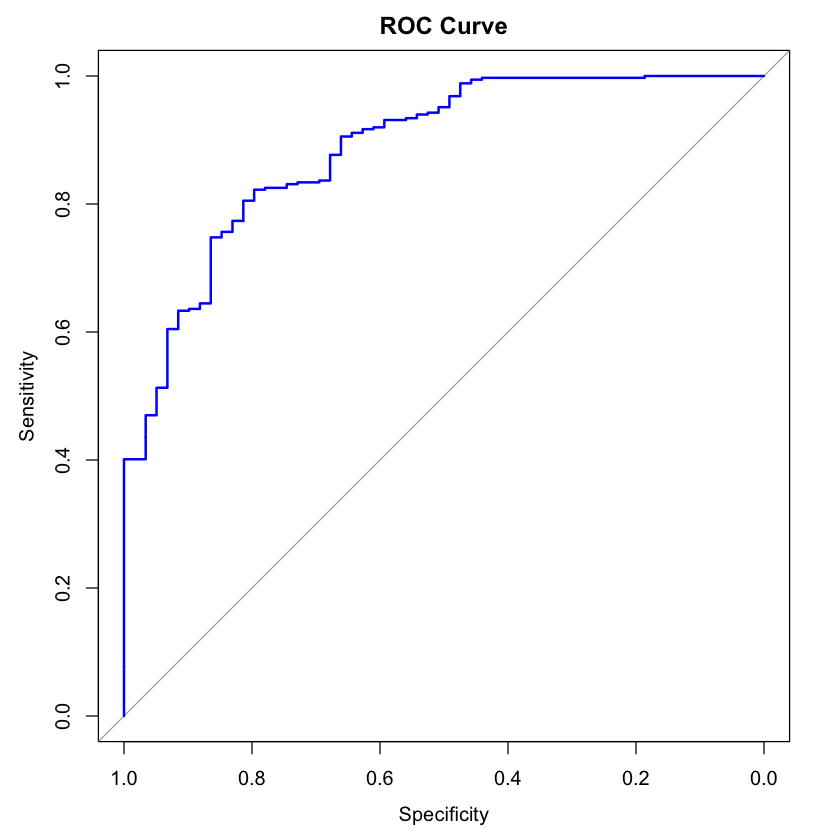

In [36]:
library(glmnet)
library(pROC)

# Load your data and prepare x and y
x <- model.matrix(D1A_1V1L_1 ~ ., df1)[, ]
y <- df1$D1A_1V1L_1

# Split data into train and test sets
set.seed(1)
train <- sample(c(TRUE, FALSE), nrow(df1), replace = TRUE, prob = c(0.8, 0.2))
test <- !train
y.test <- y[test]

# Train Ridge regression model
ridge.mod <- glmnet(x[train, ], y[train], alpha = 0, lambda.min.ratio = 0.000001)

# Cross-validation for selecting lambda
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 0, lambda.min.ratio = 0.000001)
bestlam <- cv.out$lambda.min

# Predict the test data with the best lambda
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x[test, ])

# Assuming predictions are probabilities, convert them to binary classes
predicted_classes <- ifelse(ridge.pred > 0.5, 1, 0)

# Confusion matrix
conf_matrix <- table(predicted_classes, y.test)

# Calculate Sensitivity (True Positive Rate)
sensitivity <- conf_matrix[2, 2] / sum(conf_matrix[2, ])

# Calculate Specificity (True Negative Rate)
specificity <- conf_matrix[1, 1] / sum(conf_matrix[1, ])

# Calculate Accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

# Calculate Precision (Positive Predictive Value)
precision <- conf_matrix[2, 2] / sum(conf_matrix[, 2])

# Calculate Recall (Same as Sensitivity)
recall <- sensitivity

# Calculate False Positive Rate
fpr <- 1 - specificity

# Create ROC Curve
roc_curve <- roc(y.test, ridge.pred)

# Calculate AUC (Area Under Curve)
auc_value <- auc(roc_curve)

# Print the metrics
print("Metrics:")
print(paste("Sensitivity (True Positive Rate):", sensitivity))
print(paste("Specificity (True Negative Rate):", specificity))
print(paste("Accuracy:", accuracy))
print(paste("Precision (Positive Predictive Value):", precision))
print(paste("Recall:", recall))
print(paste("False Positive Rate:", fpr))
print(paste("AUC (Area Under Curve):", auc_value))

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")

coef(ridge.mod)


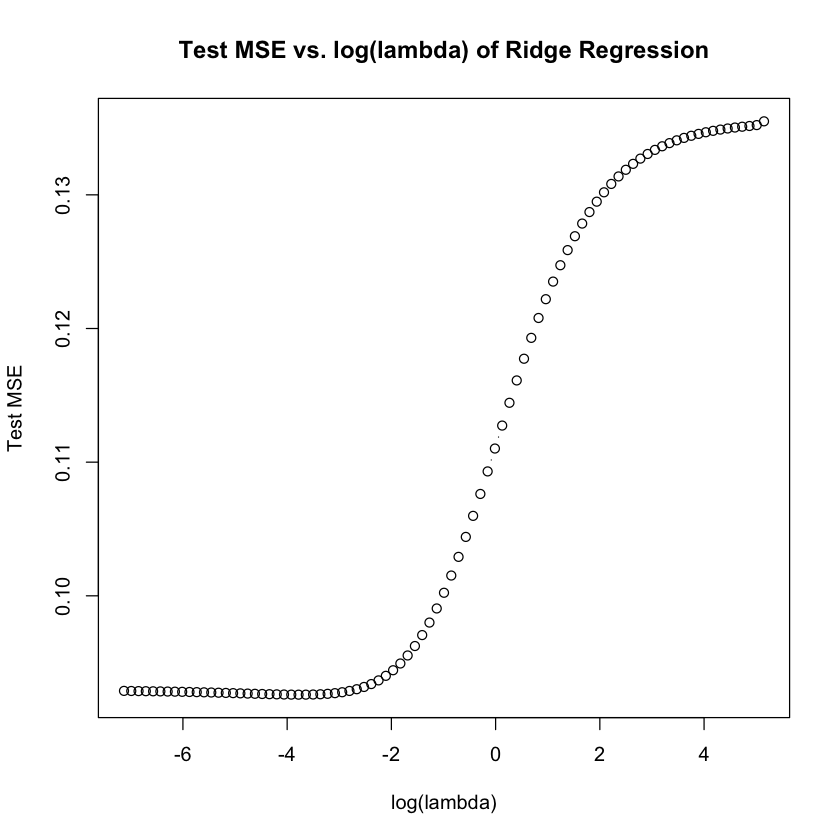

In [37]:
# Call lambda values and corresponding test MSEs
lambda_values <- cv.out$lambda
test_mses <- cv.out$cvm

# Plot the test MSE as a function of the log of the regularization 
# parameter (i.e. log($\lambda$)) for several orders of magnitude.

plot(log(lambda_values), test_mses, type = "b", 
     xlab = "log(lambda)", ylab = "Test MSE",
     main = "Test MSE vs. log(lambda) of Ridge Regression")


# Lasso

Setting levels: control = 0, case = 1

Warning message in roc.default(y[test], lasso.pred):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



[1] "Metrics:"
[1] "Sensitivity (True Positive Rate): 0.917808219178082"
[1] "Specificity (True Negative Rate): 0.674418604651163"
[1] "Accuracy: 0.892156862745098"
[1] "Precision (Positive Predictive Value): 0.959885386819484"
[1] "Recall: 0.917808219178082"
[1] "False Positive Rate: 0.325581395348837"
[1] "AUC (Area Under Curve): 0.885823903647224"


  [[ suppressing 63 column names 's0', 's1', 's2' ... ]]



60 x 63 sparse Matrix of class "dgCMatrix"
                                                                             
(Intercept) 0.8385678  0.84459594  0.8498389  0.8543989  0.8583650  0.8618145
(Intercept) .          .           .          .          .          .        
D1A_4       .          .           .          .          .          .        
A11Y        .          .           .          .          .          .        
N1_6TAKA    .          .           .          .          .          .        
N1_12       .          .           .          .          .          .        
N1_13       .          .           .          .          .          .        
N1_14       .          .           .          .          .          .        
N1_16       .          .           .          .          .          .        
N1_17       .          .           .          .          .          .        
D1A_10AF_3M .          .           .          .          .          .        
D1A_10AL_3M .        

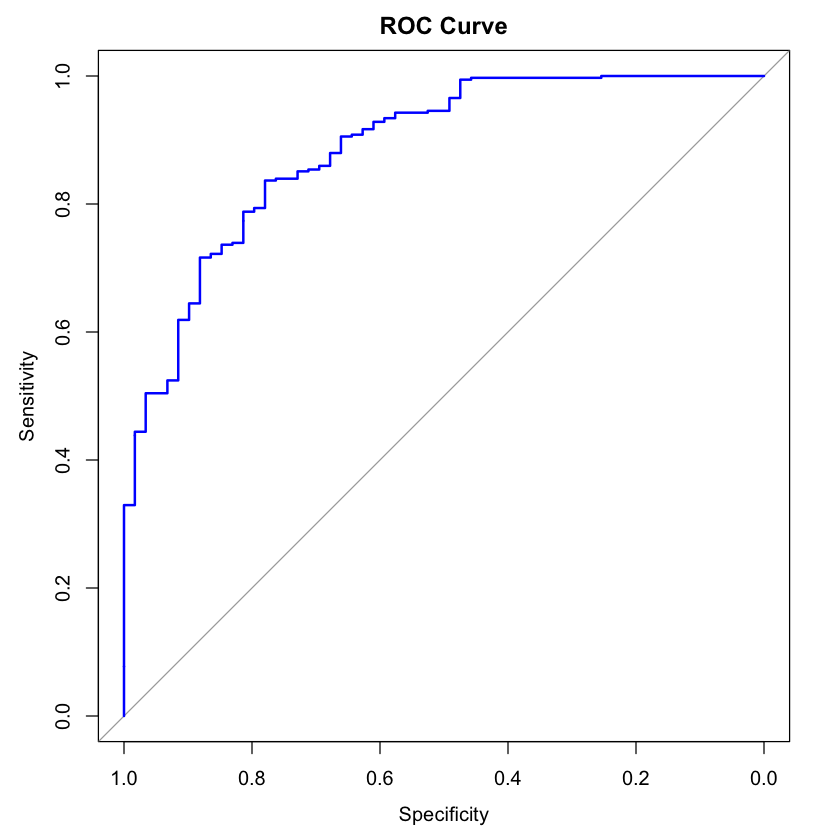

In [38]:
library(glmnet)
library(pROC)

# Train Lasso regression model
lasso.mod <- glmnet(x[train, ], y[train], alpha = 1, lambda.min.ratio = 0.000001)

# Cross-validation for selecting lambda
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 1, lambda.min.ratio = 0.000001)

# Find lambda that minimizes training MSE
bestlam <- cv.out$lambda.min

# Predict the test data with the best lambda
lasso.pred <- predict(lasso.mod, s = bestlam, newx = x[test, ])

# Assuming predictions are probabilities, convert them to binary classes
predicted_classes <- ifelse(lasso.pred > 0.5, 1, 0)

# Confusion matrix
conf_matrix <- table(predicted_classes, y[test])

# Calculate Sensitivity (True Positive Rate)
sensitivity <- conf_matrix[2, 2] / sum(conf_matrix[2, ])

# Calculate Specificity (True Negative Rate)
specificity <- conf_matrix[1, 1] / sum(conf_matrix[1, ])

# Calculate Accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

# Calculate Precision (Positive Predictive Value)
precision <- conf_matrix[2, 2] / sum(conf_matrix[, 2])

# Calculate Recall (Same as Sensitivity)
recall <- sensitivity

# Calculate False Positive Rate
fpr <- 1 - specificity

# Create ROC Curve
roc_curve <- roc(y[test], lasso.pred)

# Calculate AUC (Area Under Curve)
auc_value <- auc(roc_curve)

# Print the metrics
print("Metrics:")
print(paste("Sensitivity (True Positive Rate):", sensitivity))
print(paste("Specificity (True Negative Rate):", specificity))
print(paste("Accuracy:", accuracy))
print(paste("Precision (Positive Predictive Value):", precision))
print(paste("Recall:", recall))
print(paste("False Positive Rate:", fpr))
print(paste("AUC (Area Under Curve):", auc_value))

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")

coef(lasso.mod)

In [39]:
library(caret)
library(pROC)
library(glmnet)
library(rpart)

library(e1071)  
library(class) 


evaluate_model <- function(model, actual, predicted_prob, threshold = 0.5, plot_roc = TRUE, show_summary = FALSE) {
  predicted_classes <- ifelse(predicted_prob > threshold, 1, 0)
  confusion <- confusionMatrix(as.factor(predicted_classes), as.factor(actual), positive = "1")


  roc_result <- roc(actual, predicted_prob)
  auc_value <- auc(roc_result)


  if (plot_roc) {
    plot(roc_result, main = "ROC Curve")
    abline(a = 0, b = 1, col = "red")  # Adding a reference line
    text(x = 0.8, y = 0.2, labels = paste("AUC =", round(auc_value, 2)))
  }
  
  # Optionally print model summary
  if (show_summary && !is.null(model)) {
    print(summary(model))
  }
  

  list(
    Accuracy = confusion$overall['Accuracy'],
    Precision = confusion$byClass['Precision'],
    Recall = confusion$byClass['Sensitivity'], 
    Specificity = confusion$byClass['Specificity'],
    AUC = auc_value,
    ROC = roc_result
  )
}

#set.seed(123) # for reproducibility
#train_idx <- createDataPartition(df1$D1A_1V1L_1, p = 0.8, list = FALSE)
#train_set <- df1[train_idx, ]
#test_set <- df1[-train_idx, ]

# Elastic

Setting levels: control = 0, case = 1

Warning message in roc.default(y[test], elastic.pred):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



[1] "Metrics:"
[1] "Sensitivity (True Positive Rate): 0.918032786885246"
[1] "Specificity (True Negative Rate): 0.69047619047619"
[1] "Accuracy: 0.894607843137255"
[1] "Precision (Positive Predictive Value): 0.962750716332378"
[1] "Recall: 0.918032786885246"
[1] "False Positive Rate: 0.30952380952381"
[1] "AUC (Area Under Curve): 0.886066728182215"


  [[ suppressing 62 column names 's0', 's1', 's2' ... ]]



60 x 62 sparse Matrix of class "dgCMatrix"
                                                                             
(Intercept) 0.8385678  0.84285047  0.8468891  0.8506682  0.8541789  0.8574181
(Intercept) .          .           .          .          .          .        
D1A_4       .          .           .          .          .          .        
A11Y        .          .           .          .          .          .        
N1_6TAKA    .          .           .          .          .          .        
N1_12       .          .           .          .          .          .        
N1_13       .          .           .          .          .          .        
N1_14       .          .           .          .          .          .        
N1_16       .          .           .          .          .          .        
N1_17       .          .           .          .          .          .        
D1A_10AF_3M .          .           .          .          .          .        
D1A_10AL_3M .        

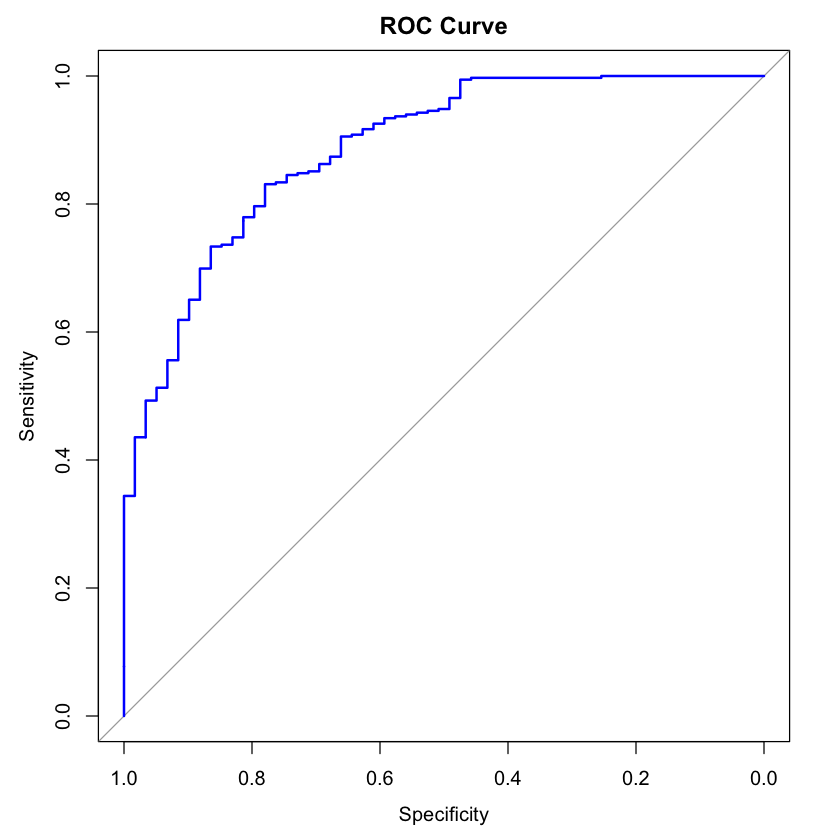

In [40]:
library(glmnet)
library(pROC)

# Train Elastic Net regression model
elastic.mod <- glmnet(x[train, ], y[train], alpha = 0.5, lambda.min.ratio = 0.000001)

# Cross-validation for selecting lambda
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 0.5, lambda.min.ratio = 0.000001)

# Find lambda that minimizes training MSE
bestlam <- cv.out$lambda.min

# Predict the test data with the best lambda
elastic.pred <- predict(elastic.mod, s = bestlam, newx = x[test, ])

# Assuming predictions are probabilities, convert them to binary classes
predicted_classes <- ifelse(elastic.pred > 0.5, 1, 0)

# Confusion matrix
conf_matrix <- table(predicted_classes, y[test])

# Calculate Sensitivity (True Positive Rate)
sensitivity <- conf_matrix[2, 2] / sum(conf_matrix[2, ])

# Calculate Specificity (True Negative Rate)
specificity <- conf_matrix[1, 1] / sum(conf_matrix[1, ])

# Calculate Accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

# Calculate Precision (Positive Predictive Value)
precision <- conf_matrix[2, 2] / sum(conf_matrix[, 2])

# Calculate Recall (Same as Sensitivity)
recall <- sensitivity

# Calculate False Positive Rate
fpr <- 1 - specificity

# Create ROC Curve
roc_curve <- roc(y[test], elastic.pred)

# Calculate AUC (Area Under Curve)
auc_value <- auc(roc_curve)

# Print the metrics
print("Metrics:")
print(paste("Sensitivity (True Positive Rate):", sensitivity))
print(paste("Specificity (True Negative Rate):", specificity))
print(paste("Accuracy:", accuracy))
print(paste("Precision (Positive Predictive Value):", precision))
print(paste("Recall:", recall))
print(paste("False Positive Rate:", fpr))
print(paste("AUC (Area Under Curve):", auc_value))

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")

coef(elastic.mod)


[1] "Report Test Error:"
Elastic Net MSE: 0.08342897 
[1] "Elastic Net Regression combines Lasso and Ridge regularization."


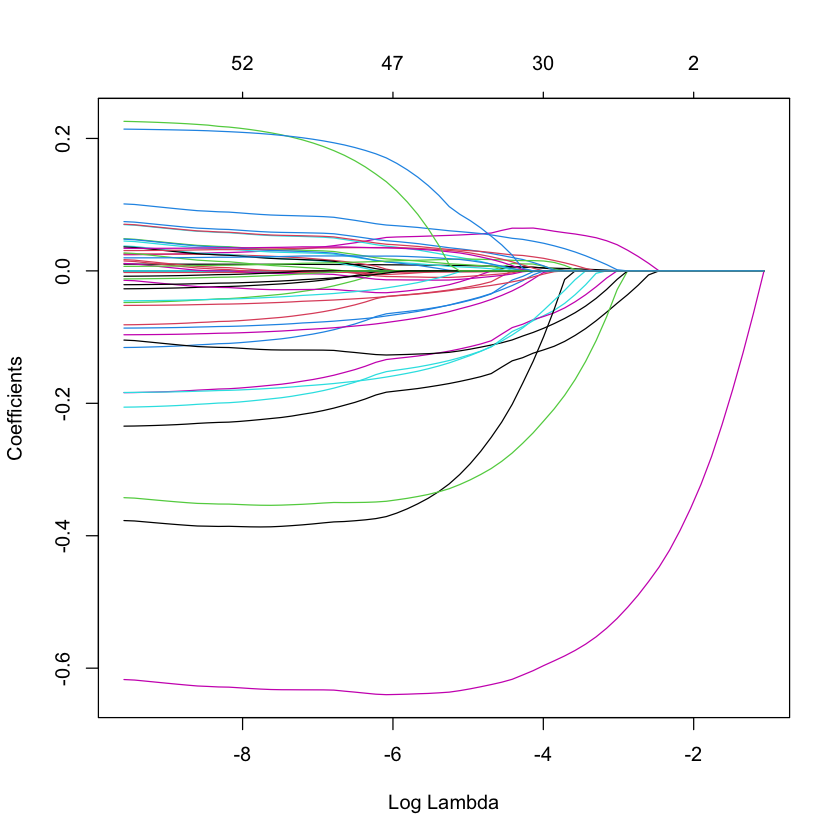

In [41]:
library(glmnet)


# Calculate the test MSE
elastic_mse <- mean((elastic.pred - y[test])^2)

# Print and report test error
print("Report Test Error:")
cat("Elastic Net MSE:", elastic_mse, "\n")
print("Elastic Net Regression combines Lasso and Ridge regularization.")

# Plot of non-zero coefficient estimates
plot(elastic.mod, xvar = "lambda")

# Get final model with selected lambda
elastic.mod.final <- glmnet(x[train, ], y[train], alpha = 0.5, lambda = bestlam)

# Sparse matrix

From Line 487 in feature_select_r_sheeba.qmd

# Decision Tree

Setting levels: control = 0, case = 1

Setting direction: controls < cases



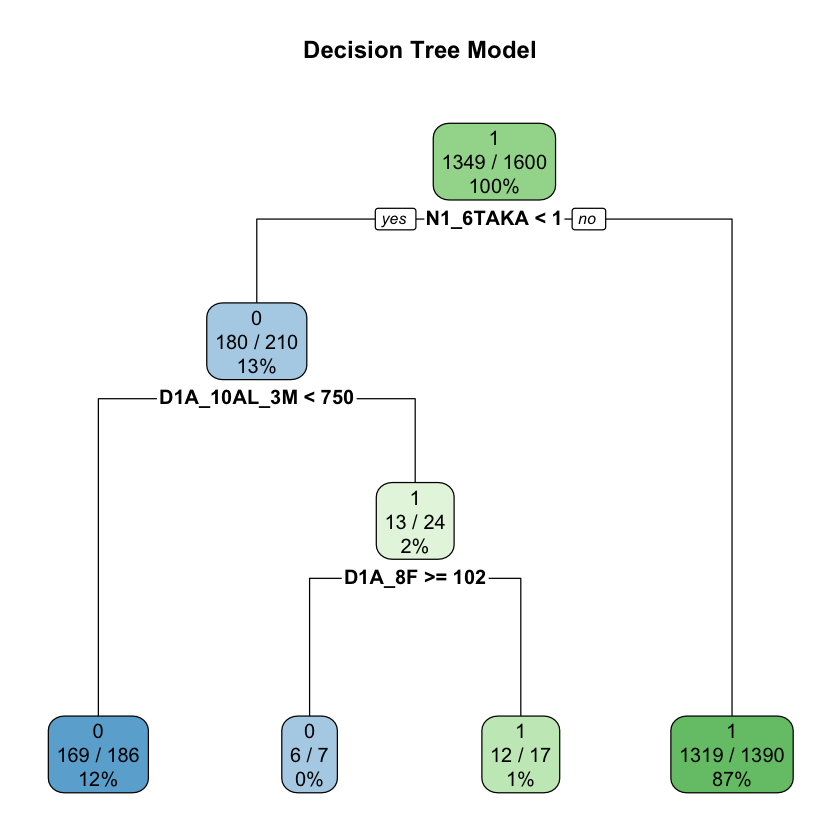

Call:
rpart(formula = D1A_1V1L_1 ~ ., data = train, method = "class")
  n= 1600 

          CP nsplit rel error    xerror       xstd
1 0.59760956      0 1.0000000 1.0000000 0.05795743
2 0.01394422      1 0.4023904 0.4063745 0.03893340
3 0.01000000      3 0.3745020 0.4262948 0.03980962

Variable importance
   N1_6TAKA      A14_17       N1_13 D1A_10AL_3M D1A_10AF_3M      D1A_8F 
         72          16           6           3           3           1 

Node number 1: 1600 observations,    complexity param=0.5976096
  predicted class=1  expected loss=0.156875  P(node) =1
    class counts:   251  1349
   probabilities: 0.157 0.843 
  left son=2 (210 obs) right son=3 (1390 obs)
  Primary splits:
      N1_6TAKA < 1    to the left,  improve=237.07340, (0 missing)
      A14_17   < 0.5  to the right, improve= 92.04358, (0 missing)
      N1_13    < 1.5  to the left,  improve= 79.03357, (0 missing)
      N1_14    < 1    to the left,  improve= 67.25052, (0 missing)
      N1_16    < 1.5  to the left

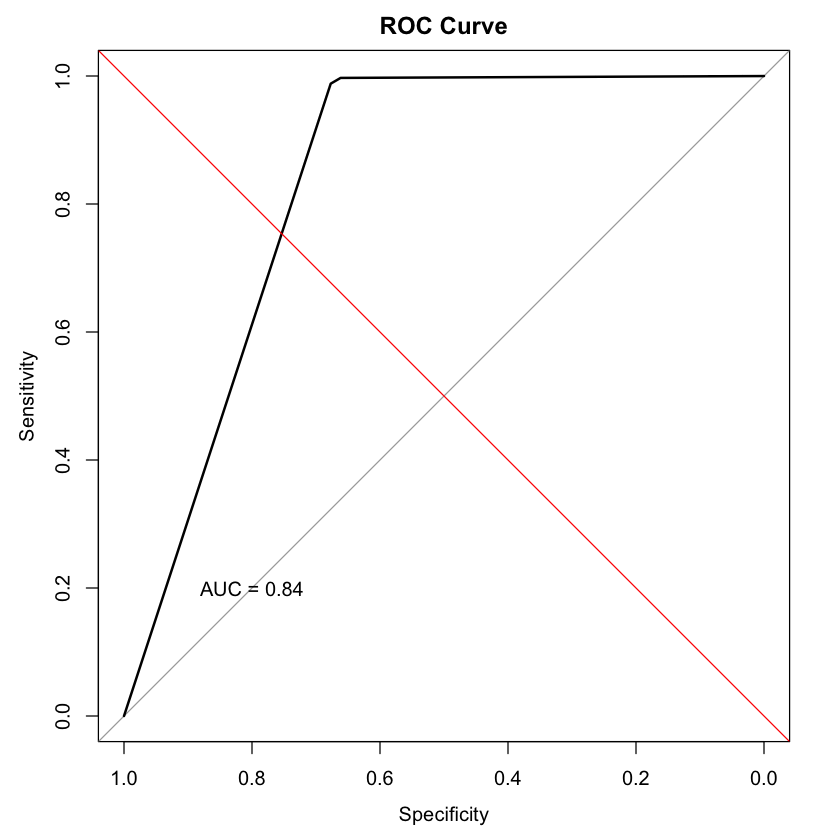

In [42]:
set.seed(123) # for reproducibility
#train_idx <- createDataPartition(df1$D1A_1V1L, p = 0.8, list = FALSE)
train_idx <- createDataPartition(df1$D1A_1V1L_1, p = 0.8, list = FALSE)
train <- df1[train_idx,]
test <- df1[-train_idx,] 

tree_model <- rpart(D1A_1V1L_1 ~ ., data = train, method = "class")
library(rpart.plot)

rpart.plot(tree_model, main="Decision Tree Model", extra=102)  # extra=102 to show node numbers and splits
predictions_prob <- predict(tree_model, newdata = test, type = "prob")
results <- evaluate_model(tree_model, test$D1A_1V1L_1, predictions_prob[,2], plot_roc = TRUE, show_summary = TRUE)

print(results)

# Decision Tree (Hyperparameter Tuned)

In [43]:
library(rpart)
control <- rpart.control(minsplit = 20, minbucket = 7, maxdepth=30)
fit <- rpart(D1A_1V1L_1 ~ ., data=train, method="class", control=control)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



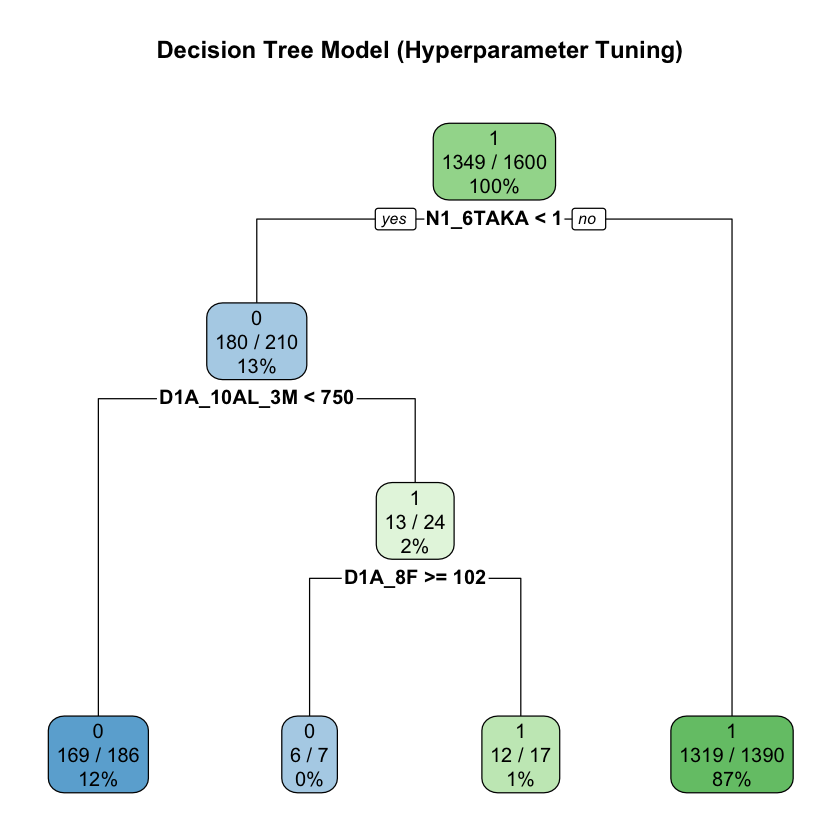

Call:
rpart(formula = D1A_1V1L_1 ~ ., data = train, method = "class", 
    control = control)
  n= 1600 

          CP nsplit rel error    xerror       xstd
1 0.59760956      0 1.0000000 1.0000000 0.05795743
2 0.01394422      1 0.4023904 0.4023904 0.03875500
3 0.01000000      3 0.3745020 0.4143426 0.03928699

Variable importance
   N1_6TAKA      A14_17       N1_13 D1A_10AL_3M D1A_10AF_3M      D1A_8F 
         72          16           6           3           3           1 

Node number 1: 1600 observations,    complexity param=0.5976096
  predicted class=1  expected loss=0.156875  P(node) =1
    class counts:   251  1349
   probabilities: 0.157 0.843 
  left son=2 (210 obs) right son=3 (1390 obs)
  Primary splits:
      N1_6TAKA < 1    to the left,  improve=237.07340, (0 missing)
      A14_17   < 0.5  to the right, improve= 92.04358, (0 missing)
      N1_13    < 1.5  to the left,  improve= 79.03357, (0 missing)
      N1_14    < 1    to the left,  improve= 67.25052, (0 missing)
      N1_

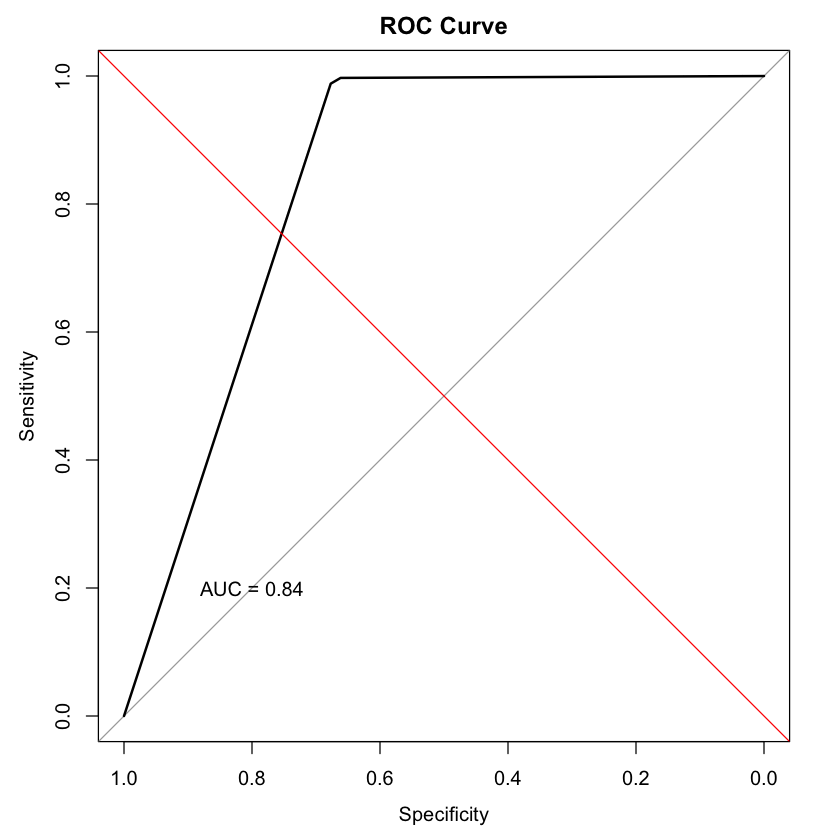

In [44]:
rpart.plot(fit, main="Decision Tree Model (Hyperparameter Tuning)", extra=102)  # extra=102 to show node numbers and splits
predictions_prob_rf <- predict(fit, newdata = test, type = "prob")
results <- evaluate_model(fit, test$D1A_1V1L_1, predictions_prob_rf[,2], plot_roc = TRUE, show_summary = TRUE)

# Random Forest

In [45]:
library(randomForest)
library(datasets)
library(caret)

train$D1A_1V1L_1 <- factor(train$D1A_1V1L_1)
test$D1A_1V1L_1 <- factor(test$D1A_1V1L_1)

rf <- randomForest(D1A_1V1L_1~., data=train, type='classification', proximity=TRUE, importance=TRUE)
print(rf)



rf_predict <- predict(rf, newdata=test, type='prob')
#results_rf <- evaluate_model(rf, test$D1A_1V1L_1, rf_predict, plot_roc = TRUE, show_summary = TRUE)
#results_rf


Call:
 randomForest(formula = D1A_1V1L_1 ~ ., data = train, type = "classification",      proximity = TRUE, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 6.06%
Confusion matrix:
    0    1 class.error
0 172   79  0.31474104
1  18 1331  0.01334322


Setting levels: control = 0, case = 1

Setting direction: controls < cases



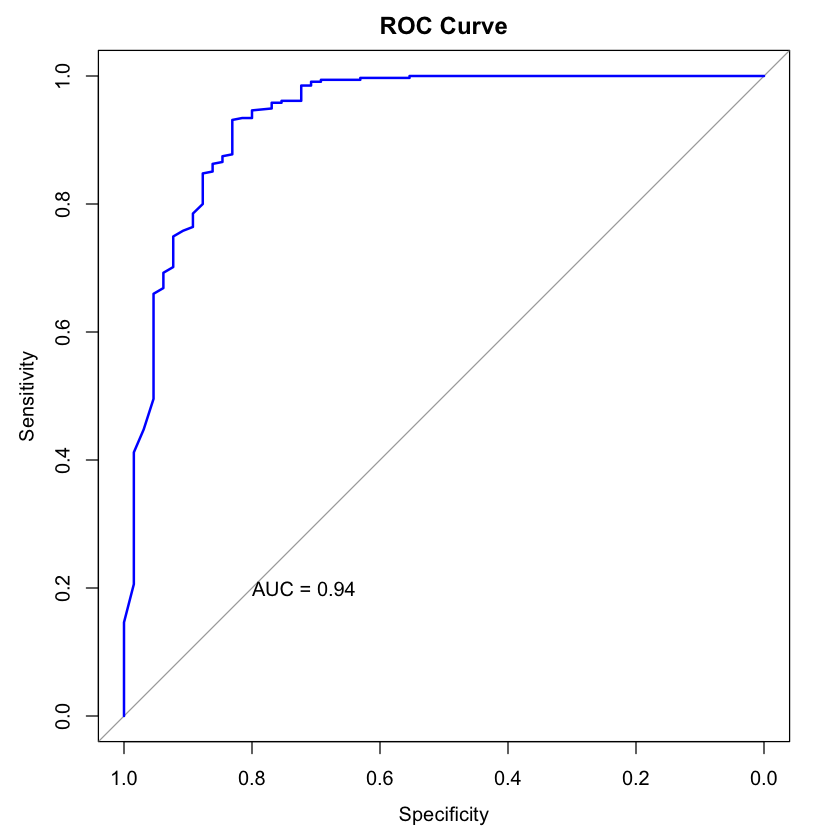

In [46]:
library(pROC)

# Extracting the probabilities of the positive class (assuming it's the first class)
prob_positive_class <- rf_predict[, "1"]

# Compute ROC curve
roc_curve <- roc(test$D1A_1V1L_1, prob_positive_class)

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")
# Add AUC value to the plot
text(0.8, 0.2, paste("AUC =", round(auc(roc_curve), 2)), adj = 0)

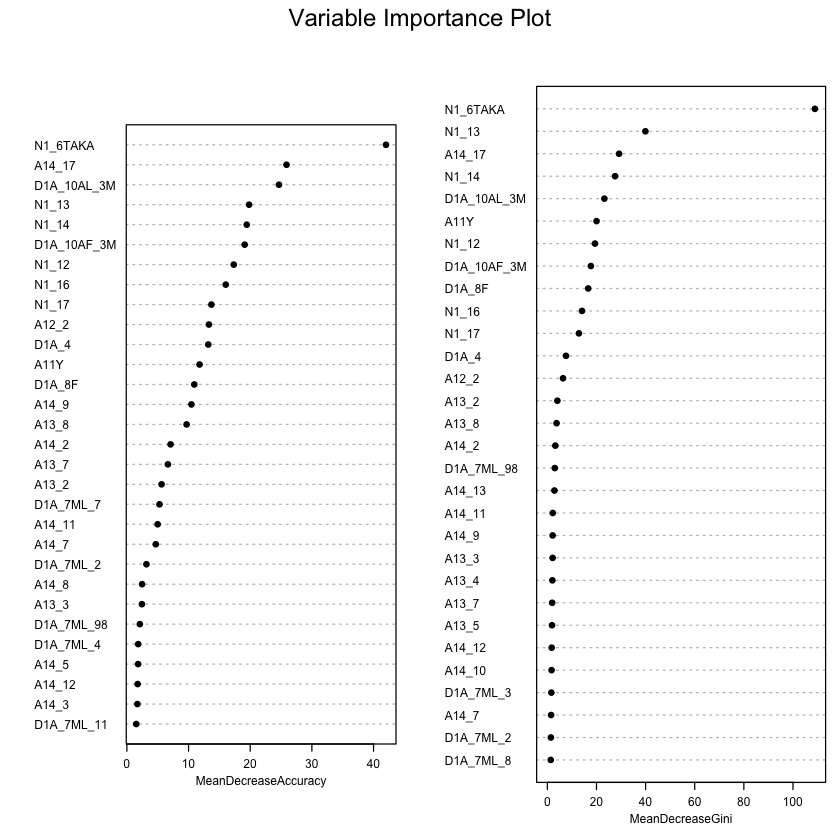

In [47]:
# Plot variable importance
varImpPlot(rf, main = "Variable Importance Plot", cex = 0.6, pch = 19)

## Don't need this - to delete

In [48]:
# Define the confusion matrix components
TN <- 1423
FN <- 77
FP <- 23
TP <- 78

# Calculations
accuracy <- (TP + TN) / (TP + TN + FP + FN)
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)  # Recall is the same as sensitivity
specificity <- TN / (TN + FP)

# Output the results
cat(sprintf("Accuracy: %f\n", accuracy))
cat(sprintf("Precision: %f\n", precision))
cat(sprintf("Recall (Sensitivity): %f\n", recall))
cat(sprintf("Specificity: %f\n", specificity))

library(pROC)
roc_result <- roc(response = c(rep(0, TN + FP), rep(1, TP + FN)), predictor = c(rep(0, TN), rep(1, FP), rep(1, TP), rep(0, FN)))
auc_value <- auc(roc_result)
cat(sprintf("AUC: %f\n", auc_value))

Accuracy: 0.937539
Precision: 0.772277
Recall (Sensitivity): 0.503226
Specificity: 0.984094


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC: 0.743660


## Don't need this - to delete

In [49]:
# with mtry
TN <- 1423
FP <- 23
FN <- 74
TP <- 81

# Calculate metrics
accuracy <- (TP + TN) / (TP + TN + FP + FN)
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)  # Also known as sensitivity
specificity <- TN / (TN + FP)

# Print the results
cat(sprintf("Accuracy: %f\n", accuracy))
cat(sprintf("Precision: %f\n", precision))
cat(sprintf("Recall (Sensitivity): %f\n", recall))
cat(sprintf("Specificity: %f\n", specificity))

Accuracy: 0.939413


Precision: 0.778846
Recall (Sensitivity): 0.522581
Specificity: 0.984094


## Don't Need This to Delete

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC: 0.984094


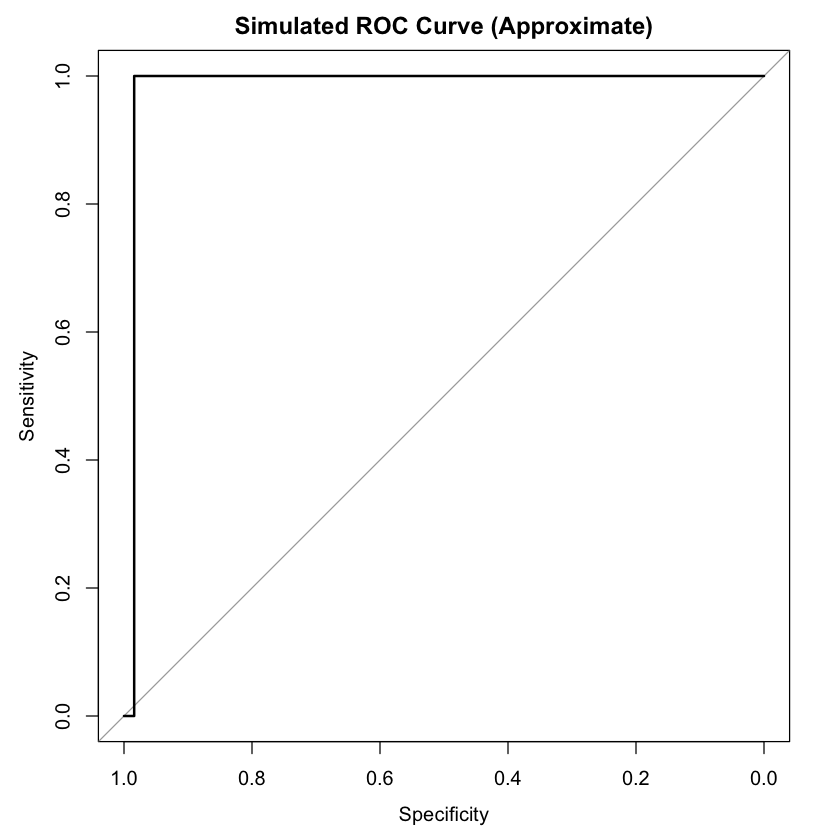

In [50]:
# Simulate predicted probabilities (Not accurate - for conceptual demonstration only)
# Assuming that TP and FN give us a threshold applied at about the median point of the positive class probabilities
simulated_probs <- c(rep(0, TN), rep(1, FP), runif(FN, 0.45, 0.55), runif(TP, 0.45, 0.55))

# Actual labels corresponding to the simulated probabilities
actual_labels <- c(rep(0, TN + FP), rep(1, TP + FN))

# Calculate ROC and AUC
roc_result <- roc(response = actual_labels, predictor = simulated_probs)
auc_value <- auc(roc_result)
plot(roc_result, main = "Simulated ROC Curve (Approximate)")

# Print AUC
cat(sprintf("AUC: %f\n", auc_value))

# Random Forest (Hyperparameter Tuned) - Don't Need this

In [51]:
# # Random Search
# control <- trainControl(method="repeatedcv", number=10, repeats=3, search="random")
# set.seed(123)
# mtry <- sqrt(ncol(train_set))
# rf_random <- train(D1A_1V9L~., data=train_set, method="rf", tuneLength=15, trControl=control)
# print(rf_random)
# plot(rf_random)

In [52]:
# rf <- randomForest(D1A_1V9L~., mtry=5, data=train_set, proximity=TRUE)
# print(rf)

# rf_predict= predict(rf, newdata=test_set, type='prob')
# results_rf <- evaluate_model(tree_model, test_set$D1A_1V9L, rf_predict[,2], plot_roc = TRUE, show_summary = TRUE)

In [53]:
# # Define the confusion matrix components
# TN <- 1423
# FP <- 23
# FN <- 74
# TP <- 81

# # Calculate metrics
# accuracy <- (TP + TN) / (TP + TN + FP + FN)
# precision <- TP / (TP + FP)
# recall <- TP / (TP + FN)  # Also known as sensitivity
# specificity <- TN / (TN + FP)

# # Print the results
# cat(sprintf("Accuracy: %f\n", accuracy))
# cat(sprintf("Precision: %f\n", precision))
# cat(sprintf("Recall (Sensitivity): %f\n", recall))
# cat(sprintf("Specificity: %f\n", specificity))

In [54]:
# # Load necessary library
# library(pROC)

# # Assuming `pred_probs` is the vector of probabilities that each test instance belongs to class 1
# roc_result <- roc(response = as.numeric(c(rep(0, TN + FP), rep(1, TP + FN))), predictor = pred_probs)
# auc_value <- auc(roc_result)
# plot(roc_result, main = "ROC Curve")

# # Print AUC
# cat(sprintf("AUC: %f\n", auc_value))

In [55]:
# print(rf_random)

In [56]:
# rf_predict= predict(rf_random, newdata = test_set, type = "prob") 
# results <- evaluate_model(tree_model, test_set$D1A_1V9L, rf_predict[,2], plot_roc = TRUE, show_summary = TRUE)

# XG Boost


In [57]:
library(xgboost)
library(caTools)
library(dplyr)
library(caret)

set.seed(42)

train_idx <- createDataPartition(df1$D1A_1V1L_1, p = 0.8, list = FALSE)
train <- df1[train_idx,]
test <- df1[-train_idx,] 


#sample_split <- sample.split(Y = df1$D1A_1V1L, SplitRatio = 0.7)
#train_set <- subset(x = df1, sample_split == TRUE)
#test_set <- subset(x = df1, sample_split == FALSE)

#y_train <- as.integer(train_set$D1A_1V1L) - 1
#y_test <- as.integer(test_set$D1A_1V1L) - 1
#X_train <- train_set %>% select(-D1A_1V1L)
#X_test <- test_set %>% select(-D1A_1V1L)

# Split the dataset into training and testing sets
X_train <- df1[train_idx, -which(names(df1) == "D1A_1V1L_1")]  # Exclude the target variable from the training set
y_train <- df1[train_idx, "D1A_1V1L_1"]   # Extract the target variable for the training set

X_test <- df1[-train_idx, -which(names(df1) == "D1A_1V1L_1")]  # Exclude the target variable from the testing set
y_test <- df1[-train_idx, "D1A_1V1L_1"]   # Extract the target variable for the testing set


xgb_train <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
xgb_test <- xgb.DMatrix(data = as.matrix(X_test), label = y_test)
xgb_params <- list(
  booster = "gbtree",
  eta = 0.01,
  max_depth = 2,
  gamma = 4,
  subsample = 0.75,
  colsample_bytree = 1,
  objective = "binary:logistic",
  eval_metric = "mlogloss",
  num_class = length(levels(df1$D1A_1V1L))
)

xgb_model <- xgb.train(
  params = xgb_params,
  data = xgb_train,
  nrounds = 5000,
  verbose = 1
)
xgb_model


Attaching package: 'dplyr'


The following object is masked from 'package:xgboost':

    slice


The following object is masked from 'package:randomForest':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




##### xgb.Booster
raw: 4.2 Mb 
call:
  xgb.train(params = xgb_params, data = xgb_train, nrounds = 5000, 
    verbose = 1)
params (as set within xgb.train):
  booster = "gbtree", eta = "0.01", max_depth = "2", gamma = "4", subsample = "0.75", colsample_bytree = "1", objective = "binary:logistic", eval_metric = "mlogloss", num_class = "0", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
# of features: 58 
niter: 5000
nfeatures : 58 

In [58]:
# Make predictions on the test set
predictions <- predict(xgb_model, xgb_test)

# Convert probabilities to class labels, assign greater than 0.5 to Positive
pred_classes <- ifelse(predictions > 0.5, "Positive", "Negative")

# Create the confusion matrix
cm <- table(Actual = test$D1A_1V1L_1, Predicted = pred_classes)

# Confusion Matrix
print(cm)

      Predicted
Actual Negative Positive
     0       58       16
     1        7      319


In [59]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP <- 319
TN <- 58
FP <- 16
FN <- 7

# Calculate accuracy
accuracy <- (TP + TN) / sum(cm)

# Calculate precision
precision <- TP / (TP + FP)

# Calculate recall (also called sensitivity)
recall <- TP / (TP + FN)

# Calculate F1 score
F1 <- 2 * (precision * recall) / (precision + recall)

# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", F1, "\n")

Accuracy: 0.9425 
Precision: 0.9522388 
Recall: 0.9785276 
F1 Score: 0.9652042 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC: 0.981471

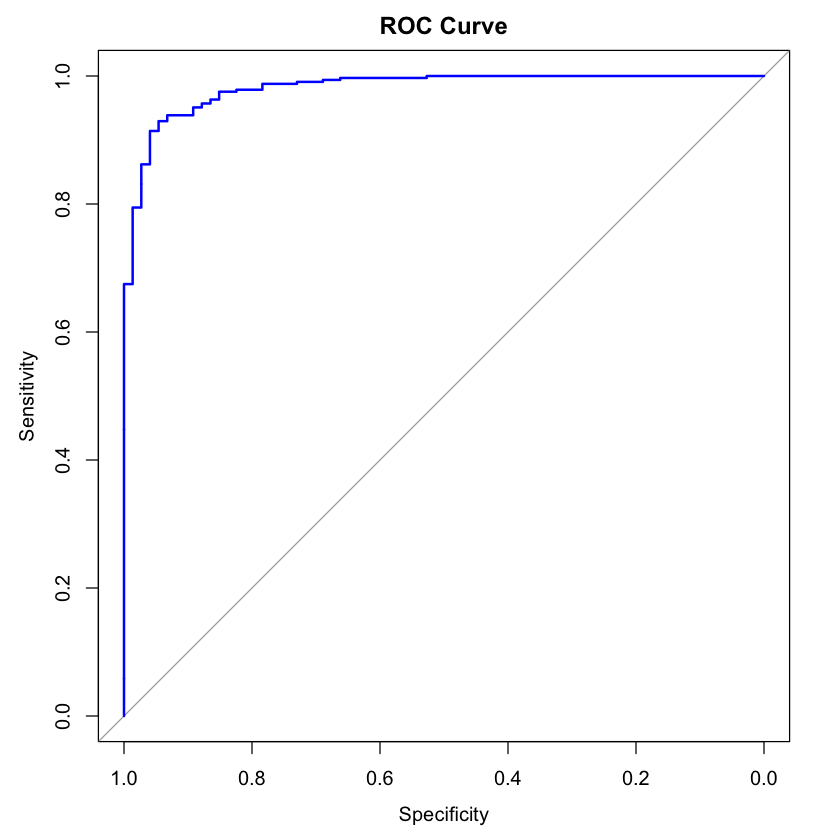

In [60]:
library(pROC)

pred_probs <- predict(xgb_model, xgb_test)
# Compute ROC curve
roc_curve <- roc(y_test, pred_probs)

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")

auc_value <- auc(roc_curve)
cat(sprintf("AUC: %f", auc_value))

In [61]:
# Get variable importance
importance <- xgb.importance(model = xgb_model)

# Print the variable importance
print(importance)

        Feature         Gain        Cover    Frequency
 1:    N1_6TAKA 0.5612330288 0.2414881768 0.1472964574
 2: D1A_10AL_3M 0.0609914469 0.0679072500 0.1202610317
 3:       N1_14 0.0529529219 0.1133333039 0.0733374767
 4:      D1A_8F 0.0495385629 0.1159481241 0.0978868863
 5:      A14_17 0.0446480903 0.0746981992 0.0540708515
 6:        A11Y 0.0415233500 0.0804492824 0.0876320696
 7: D1A_10AF_3M 0.0350530518 0.0580184588 0.0798632691
 8:       N1_12 0.0304779481 0.0504952772 0.0649471722
 9:       N1_16 0.0177077918 0.0226183753 0.0385332505
10:       N1_13 0.0164503521 0.0300356659 0.0413300186
11:       D1A_4 0.0127972706 0.0209860825 0.0267246737
12:       A13_8 0.0107921067 0.0229505020 0.0248601616
13:       N1_17 0.0102594648 0.0157722135 0.0208203853
14:       A12_2 0.0097427315 0.0184533893 0.0236171535
15:       A13_2 0.0096760378 0.0061490748 0.0155376010
16:       A14_9 0.0078442205 0.0176617918 0.0180236172
17:      A14_12 0.0058585761 0.0090102716 0.0105655687
18:       

In [63]:
plot.roc(test$D1A_1V1L_1, ridge.pred, main = "ROC Curves", col = "red")
par(new = TRUE)
plot.roc(test$D1A_1V1L_1, lasso.pred, col = "blue", add = TRUE)
par(new = TRUE)
plot.roc(test$D1A_1V1L_1, elastic.pred, col = "green", add = TRUE)
par(new = TRUE)
plot.roc(test$D1A_1V1L_1, predictions_prob[,2], col = "purple", add = TRUE)
par(new = TRUE)
plot.roc(test$D1A_1V1L_1, rf_predict, col = "brown", add = TRUE)

legend("bottomright", legend = c("Ridge Regression", "Lasso Regression", "Elastic Net Regression", "Decision Tree", "Random Forest"),
       col = c("red", "blue", "green", "purple", "brown"), lwd = 2)


Setting levels: control = 0, case = 1

Warning message in roc.default(x, predictor, plot = TRUE, ...):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."


ERROR: Error in roc.default(x, predictor, plot = TRUE, ...): Response and predictor must be vectors of the same length.
